# Notebook for creating csv with np data

In [1]:
import pandas as pd
import uproot as up
import os

In [24]:
kinematic_list_short = ["M_ki","M_kf","delta_k_T","ki_T"]
file_dir = "../../OutputFiles/Slurm_Spring_24/July_17/Run_2_single_pion/"
num_files = len([name for name in os.listdir(file_dir) if not os.path.isdir(name)])
file_names = [name for name in os.listdir(file_dir) if not os.path.isdir(name)]
# num_files = 3
# file_names = ["file_0.root","file_1.root","file_2.root"]


In [21]:
driver_subset = ["file_147.root","file_35.root","file_187.root","file_57.root","file_125.root","file_66.root","file_114.root"]

In [22]:
ext_list = [":tree_low",":tree_high"]
high_low = ["low","high"]
for high_low_idx in range(2):
    tree_ext = ext_list[high_low_idx]
    if(high_low_idx == 0):
#         print(num_files)
        for i in range(len(driver_subset)):
            if(i == 0):
                np = up.open(file_dir + driver_subset[i] + tree_ext).arrays(kinematic_list_short,library="pd")
            else:
                np = pd.concat([np,up.open(file_dir + driver_subset[i] + tree_ext).arrays(kinematic_list_short,library="pd")],ignore_index = True)
    else:
        for i in range(num_files):
            if(i == 0):
                np = up.open(file_dir + file_names[i] + tree_ext).arrays(kinematic_list_short,library="pd")
            else:
                 np = pd.concat([np,up.open(file_dir + file_names[i] + tree_ext).arrays(kinematic_list_short,library="pd")],ignore_index = True)
        
    np.to_excel("xlsx/np/July_17_" + high_low[high_low_idx] + ".xlsx")

In [32]:
inputs = pd.read_excel("xlsx/np/July_17_high.xlsx")

In [27]:
inputs.keys()

Index(['Unnamed: 0', 'M_ki', 'M_kf', 'delta_k_T', 'ki_T'], dtype='object')

In [28]:
import matplotlib.pyplot as plot

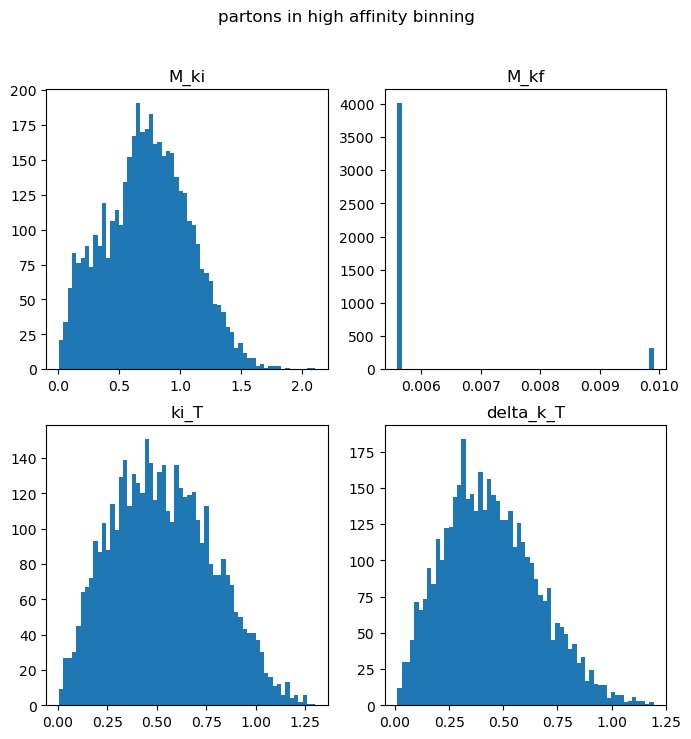

In [33]:
fig, axs = plot.subplots(2,2,figsize=(8,8))
fig.suptitle("partons in high affinity binning")
axs[0][0].hist(inputs["M_ki"],bins = 60);
axs[0][0].set_title("M_ki")
axs[0][1].hist(inputs["M_kf"],bins = 60);
axs[0][1].set_title("M_kf")
axs[1][0].hist(inputs["ki_T"],bins = 60);
axs[1][0].set_title("ki_T")
axs[1][1].hist(inputs["delta_k_T"],bins = 60);
axs[1][1].set_title("delta_k_T")
fig.savefig("xlsx/np/xlsx_plot_high.jpeg")